# check for significance in FMA for shank length-tip size groups

In [65]:
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import kruskal
from scipy.stats import normaltest
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scikit_posthocs import posthoc_dunn, posthoc_conover
plt.rcParams['svg.fonttype'] = 'none'

# epineuralDF = pd.read_csv("epineural\\selectiveDF.csv")
# epineuralDF.loc[epineuralDF['binarySearchRes']==0.4,'binarySearchRes'] = 0.41
# epiTH = epineuralDF['Threshold (nC)']
# epiDR = epineuralDF['Dynamic Range (nC)']

FMAlayout = pd.read_csv('FMA_layout.csv')
penetratingDF = pd.read_csv("selectiveDF.csv")
penetratingDF = penetratingDF[(penetratingDF['subject'] == 'Electro') | (penetratingDF['subject'] == 'Freeze')]
penTH = penetratingDF['Threshold (nC)']
penDR = penetratingDF['Dynamic Range (nC)']

tipSize = []
shankLength = []
for index, iRow in penetratingDF.iterrows():
    tipSize.append(FMAlayout[FMAlayout['stimChan']==iRow['stimChan']]['tipSize'].item())
    shankLength.append(FMAlayout[FMAlayout['stimChan']==iRow['stimChan']]['length'].item())

penetratingDF.insert(2, 'tipSize', tipSize)
penetratingDF.insert(2, 'shankLength', shankLength)


In [66]:
penetratingDF

,DRG,nerve,shankLength,tipSize,subject,Threshold,Dynamic Range,Threshold (nC),Dynamic Range (nC),type,binarySearchRes,stimChan
48,DRG - L6,CP,0.9,50,Electro,8.000000,1.750000,1.639,0.359,selective,0.205,2.0
49,DRG - L6,dTib,1.9,50,Electro,10.625000,0.875000,2.176,0.180,selective,0.205,4.0
50,DRG - L6,Tib,2.1,150,Electro,8.000000,1.750000,1.639,0.359,selective,0.205,5.0
51,DRG - L6,Tib,0.9,50,Electro,14.125000,0.875000,2.893,0.180,selective,0.205,6.0
52,DRG - L6,VM,1.5,150,Electro,11.500000,0.875000,2.356,0.180,selective,0.205,7.0
53,DRG - L6,Sph,1.3,50,Electro,13.250000,1.750000,2.714,0.359,selective,0.205,9.0
54,DRG - L6,VM,1.7,50,Electro,11.500000,2.625000,2.356,0.538,selective,0.205,15.0
55,DRG - L6,VM,1.1,150,Electro,13.250000,0.875000,2.714,0.180,selective,0.205,16.0
56,DRG - L6,VM,1.5,50,Electro,10.625000,0.875000,2.176,0.180,selective,0.205,17.0
57,DRG - L6,Tib,1.9,150,Electro,11.500000,2.625000,2.356,0.538,selective,0.205,18.0


# Threshold comparison

[0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1]
0.7309667528083976


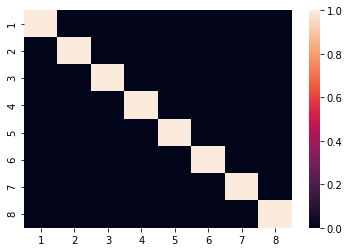

In [67]:
lengthGroups = [group["Threshold (nC)"].values for name, group in penetratingDF.groupby('shankLength')]
print [name for name, group in penetratingDF.groupby('shankLength')]
k1,p1 = kruskal(*lengthGroups)
print p1
sns.heatmap(posthoc_dunn(lengthGroups) < 0.01)


[50L, 150L]
0.9837247460061026


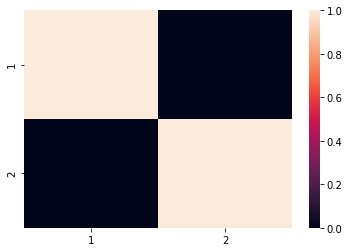

In [68]:
lengthGroups = [group["Threshold (nC)"].values for name, group in penetratingDF.groupby('tipSize')]
print [name for name, group in penetratingDF.groupby('tipSize')]
k1,p1 = kruskal(*lengthGroups)
print p1
sns.heatmap(posthoc_dunn(lengthGroups) < 0.01)


[(50, 0.7), (50, 0.9), (50, 1.1), (50, 1.3), (50, 1.5), (50, 1.7), (50, 1.9), (50, 2.1), (150, 0.7), (150, 1.1), (150, 1.3), (150, 1.5), (150, 1.7), (150, 1.9), (150, 2.1)]
0.9006555690254527


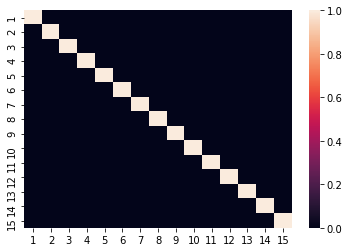

In [69]:
lengthGroups = [group["Threshold (nC)"].values for name, group in penetratingDF.groupby(['tipSize', 'shankLength'])]
print [name for name, group in penetratingDF.groupby(['tipSize', 'shankLength'])]
k1,p1 = kruskal(*lengthGroups)
print p1
sns.heatmap(posthoc_dunn(lengthGroups) < 0.01)


# Dynamic Range

[0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1]
0.9220518147074123


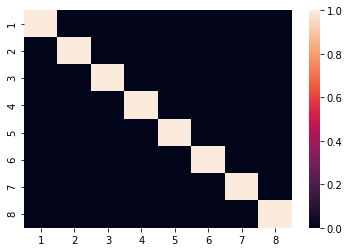

In [70]:
lengthGroups = [group["Dynamic Range (nC)"].values for name, group in penetratingDF.groupby('shankLength')]
print [name for name, group in penetratingDF.groupby('shankLength')]
k1,p1 = kruskal(*lengthGroups)
print p1
sns.heatmap(posthoc_dunn(lengthGroups) < 0.01)

[50L, 150L]
0.5357470494006948


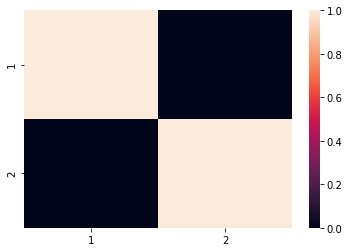

In [71]:
lengthGroups = [group["Dynamic Range (nC)"].values for name, group in penetratingDF.groupby('tipSize')]
print [name for name, group in penetratingDF.groupby('tipSize')]
k1,p1 = kruskal(*lengthGroups)
print p1
sns.heatmap(posthoc_dunn(lengthGroups) < 0.01)

[(50, 0.7), (50, 0.9), (50, 1.1), (50, 1.3), (50, 1.5), (50, 1.7), (50, 1.9), (50, 2.1), (150, 0.7), (150, 1.1), (150, 1.3), (150, 1.5), (150, 1.7), (150, 1.9), (150, 2.1)]
0.9359421759046631


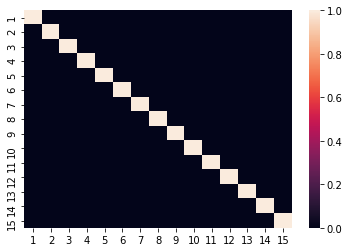

In [72]:
lengthGroups = [group["Dynamic Range (nC)"].values for name, group in penetratingDF.groupby(['tipSize', 'shankLength'])]
print [name for name, group in penetratingDF.groupby(['tipSize', 'shankLength'])]
k1,p1 = kruskal(*lengthGroups)
print p1
sns.heatmap(posthoc_dunn(lengthGroups) < 0.01)